# Example : k times repetition with the list of k input files 

DeepBiome package takes microbiome abundance data as input and uses the phylogenetic taxonomy to guide the decision of the optimal number of layers and neurons in the deep learning architecture.

To use DeepBiome, you can experiment (1) __k times repetition__ or (2) __k fold cross-validation__.
For each experiment, we asuume that the dataset is given by
- __A list of k input files for k times repetition.__
- __One input file for k fold cross-validation.__

This notebook contains an example of (1) __k times repetition__ for the deep neural netowrk using deepbiome.

## 1. Load library

First, we have to load deepbiome package. The deepbiome package is build on the tensorflow and keras library

In [1]:
import os
import logging
import json
from pkg_resources import resource_filename

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from deepbiome import deepbiome

Using TensorFlow backend.


## 2. Prepare the dataset

In this example, we assume that we have __a list of k input files for k times repetition.__

DeepBiome needs 4 data files as follows:
1. __the tree information__
1. __the lists of the input files__ (each file has all sample's information for one repetition)
1. __the list of the names of input files__ 
1. __y__

In addition, we can set __the training index for each repetition__. If we set the index file, DeepBiome builds the training set for each repetition based on each fold index in the index file. If not, DeepBiome will generate the index file locally.


Eath data should have the csv format. Below is the example of each file.

### Example of the tree information

First we need a file about the phylogenetic tree information. This tree information file should have the format below:

In [2]:
tree_information = pd.read_csv(resource_filename('deepbiome', 'tests/data/genus48_dic.csv'))
tree_information

Genus                           Family  \
0                   Streptococcus                 Streptococcaceae   
1                      Tropheryma                Cellulomonadaceae   
2                     Veillonella                  Veillonellaceae   
3                     Actinomyces                 Actinomycetaceae   
4                  Flavobacterium                Flavobacteriaceae   
5                      Prevotella                   Prevotellaceae   
6                   Porphyromonas               Porphyromonadaceae   
7                      Parvimonas  Clostridiales_Incertae_Sedis_XI   
8                   Fusobacterium                 Fusobacteriaceae   
9               Propionibacterium             Propionibacteriaceae   
10                        Gemella     Bacillales_Incertae_Sedis_XI   
11                         Rothia                   Micrococcaceae   
12                 Granulicatella                Carnobacteriaceae   
13                      Neisseria                    Neisseriaceae   
14                  Lactobacillus                 Lactobacillaceae   
15                    Megasphaera                  Veillonellaceae   
16                      Catonella                  Lachnospiraceae   
17                      Atopobium                Coriobacteriaceae   
18                  Campylobacter               Campylobacteraceae   
19                 Capnocytophaga                Flavobacteriaceae   
20                  Solobacterium              Erysipelotrichaceae   
21                       Moryella                  Lachnospiraceae   
22      TM7_genera_incertae_sedis        TM7_genera_incertae_sedis   
23                 Staphylococcus                Staphylococcaceae   
24                     Filifactor            Peptostreptococcaceae   
25                   Oribacterium                  Lachnospiraceae   
26                   Burkholderia                 Burkholderiaceae   
27                       Sneathia                 Leptotrichiaceae   
28                      Treponema                  Spirochaetaceae   
29                      Moraxella                    Moraxellaceae   
30                    Haemophilus                  Pasteurellaceae   
31                    Selenomonas                  Veillonellaceae   
32                Corynebacterium               Corynebacteriaceae   
33                      Rhizobium                     Rhizobiaceae   
34                 Bradyrhizobium                Bradyrhizobiaceae   
35               Methylobacterium              Methylobacteriaceae   
36      OD1_genera_incertae_sedis        OD1_genera_incertae_sedis   
37                     Finegoldia  Clostridiales_Incertae_Sedis_XI   
38                 Microbacterium                Microbacteriaceae   
39                   Sphingomonas                Sphingomonadaceae   
40               Chryseobacterium                Flavobacteriaceae   
41                    Bacteroides                   Bacteroidaceae   
42                   Bdellovibrio               Bdellovibrionaceae   
43                   Streptophyta                      Chloroplast   
44  Lachnospiracea_incertae_sedis                  Lachnospiraceae   
45                     Paracoccus                 Rhodobacteraceae   
46                 Fastidiosipila                  Ruminococcaceae   
47                 Pseudonocardia               Pseudonocardiaceae   

                        Order                      Class  \
0             Lactobacillales                    Bacilli   
1             Actinomycetales             Actinobacteria   
2             Selenomonadales              Negativicutes   
3             Actinomycetales             Actinobacteria   
4            Flavobacteriales              Flavobacteria   
5               Bacteroidales                Bacteroidia   
6               Bacteroidales                Bacteroidia   
7               Clostridiales                 Clostridia   
8             Fusobacteriales               Fusobacteria 

This file has `.csv` format below:

In [3]:
with open(resource_filename('deepbiome', 'tests/data/genus48_dic.csv')) as f:
    print(f.read())

Genus,Family,Order,Class,Phylum,Domain
Streptococcus,Streptococcaceae,Lactobacillales,Bacilli,Firmicutes,Bacteria
Tropheryma,Cellulomonadaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
Veillonella,Veillonellaceae,Selenomonadales,Negativicutes,Firmicutes,Bacteria
Actinomyces,Actinomycetaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
Flavobacterium,Flavobacteriaceae,Flavobacteriales,Flavobacteria,Bacteroidetes,Bacteria
Prevotella,Prevotellaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
Porphyromonas,Porphyromonadaceae,Bacteroidales,Bacteroidia,Bacteroidetes,Bacteria
Parvimonas,Clostridiales_Incertae_Sedis_XI,Clostridiales,Clostridia,Firmicutes,Bacteria
Fusobacterium,Fusobacteriaceae,Fusobacteriales,Fusobacteria,Fusobacteria,Bacteria
Propionibacterium,Propionibacteriaceae,Actinomycetales,Actinobacteria,Actinobacteria,Bacteria
Gemella,Bacillales_Incertae_Sedis_XI,Bacillales,Bacilli,Firmicutes,Bacteria
Rothia,Micrococcaceae,Actinomycetales,Actinobacteria,Act

### Example of the list of the name of input files

In this example. we assume that input is given by the lists of files. Each file has all sample's information for one repeatition.
If we want to use the list of the input files, we need to make a list of the names of each input file. Below is an example file for `k=1000` repetition.

In [4]:
list_of_input_files = pd.read_csv(resource_filename('deepbiome', 'tests/data/gcount_list.csv'), header=None)
list_of_input_files.head()

0
0  gcount_0001.csv
1  gcount_0002.csv
2  gcount_0003.csv
3  gcount_0004.csv
4  gcount_0005.csv

In [5]:
list_of_input_files.tail()

0
995  gcount_0996.csv
996  gcount_0997.csv
997  gcount_0998.csv
998  gcount_0999.csv
999  gcount_1000.csv

### Example of the lists of the input files

Below is an example of each input file. This example has 1000 samples as rows, and the abandunce of each microbiome as columns. Below is an example file for `k=1000` repetition. This example is `gcount_0001.csv` for the first repetition in the list of the names of input files above. This file has the 4 samples' microbiome abandunce.

In [6]:
x_1 = pd.read_csv(resource_filename('deepbiome', 'tests/data/count/%s' % list_of_input_files.iloc[0,0]))
x_1.head()

Streptococcus  Tropheryma  Veillonella  Actinomyces  Flavobacterium  \
0            841           0          813          505               5   
1           1445           0            1          573               0   
2           1259           0          805          650               0   
3            982           0          327          594               0   
4           1162           0          130          969             163   

   Prevotella  Porphyromonas  Parvimonas  Fusobacterium  Propionibacterium  \
0        3224              0         362             11                 65   
1        1278             82          85             69                154   
2        1088              0           0             74                  0   
3         960             81          19              9                  0   
4        1515            167           4            162                  3   

   ...  Microbacterium  Sphingomonas  Chryseobacterium  Bacteroides  \
0  ...               0            87                 0            0   
1  ...               0             1                 2            0   
2  ...               0             2                 8            1   
3  ...             157             1                 0            4   
4  ...               0             9                 0            0   

   Bdellovibrio  Streptophyta  Lachnospiracea_incertae_sedis  Paracoccus  \
0             0             0                              0           0   
1             0             0                              0           0   
2            39             0                              0           0   
3            60             0                              0           0   
4             0             0                             60           0   

   Fastidiosipila  Pseudonocardia  
0               0            2133  
1               0            3638  
2               0            3445  
3               0            3507  
4               0            3945  

[5 rows x 48 columns]

In [7]:
x_1.tail()

Streptococcus  Tropheryma  Veillonella  Actinomyces  Flavobacterium  \
995           1401           4           30          526               0   
996           2655           6          106           74               0   
997            335           0           71          259              67   
998            649          69          966         1227               0   
999           1258           0            0         1119               0   

     Prevotella  Porphyromonas  Parvimonas  Fusobacterium  Propionibacterium  \
995         923             25           0            127                  0   
996         952             76          13            158                125   
997         718              1           4              4                167   
998         508              2          30            550                  0   
999        2348             25           0            137                176   

     ...  Microbacterium  Sphingomonas  Chryseobacterium  Bacteroides  \
995  ...               0             0                 7            0   
996  ...               0             2                 0            0   
997  ...               0           246                 0            0   
998  ...               0             0                 0            0   
999  ...               0             2                 0            0   

     Bdellovibrio  Streptophyta  Lachnospiracea_incertae_sedis  Paracoccus  \
995             0             0                              0           0   
996             0             0                              0           0   
997             6             0                              0           0   
998             0             6                              0           0   
999             0             0                              0           0   

     Fastidiosipila  Pseudonocardia  
995               0            4470  
996               0            2826  
997               0            6527  
998               0            4402  
999               0            2585  

[5 rows x 48 columns]

This file has .csv format below:

In [8]:
with open(resource_filename('deepbiome', 'tests/data/count/%s' % list_of_input_files.iloc[0,0])) as f:
    print(f.read())

"Streptococcus","Tropheryma","Veillonella","Actinomyces","Flavobacterium","Prevotella","Porphyromonas","Parvimonas","Fusobacterium","Propionibacterium","Gemella","Rothia","Granulicatella","Neisseria","Lactobacillus","Megasphaera","Catonella","Atopobium","Campylobacter","Capnocytophaga","Solobacterium","Moryella","TM7_genera_incertae_sedis","Staphylococcus","Filifactor","Oribacterium","Burkholderia","Sneathia","Treponema","Moraxella","Haemophilus","Selenomonas","Corynebacterium","Rhizobium","Bradyrhizobium","Methylobacterium","OD1_genera_incertae_sedis","Finegoldia","Microbacterium","Sphingomonas","Chryseobacterium","Bacteroides","Bdellovibrio","Streptophyta","Lachnospiracea_incertae_sedis","Paracoccus","Fastidiosipila","Pseudonocardia"
841,0,813,505,5,3224,0,362,11,65,156,1,55,0,1,20,382,1,333,24,80,43,309,2,3,4,0,1,32,0,2,4,382,0,0,96,23,0,0,87,0,0,0,0,0,0,0,2133
1445,0,1,573,0,1278,82,85,69,154,436,3,0,61,440,0,394,83,33,123,0,49,414,0,0,37,0,0,42,0,0,384,27,0,0,0,146,0,0,1,2,0,0,0,0

### Example of the Y (regression)

This is an example of the output file for regression problem. One column contains y samples for one repeatition. 
For each repeatition (column) has outputs of 4 samples for each repeatition. Below example file has 1000 samples in row, `k=1000` repetition in column.

In [9]:
y = pd.read_csv(resource_filename('deepbiome', 'tests/data/regression_y.csv'))
y.head()

x1        x2        x3        x4        x5        x6        x7  \
0  4.997270  5.492354  5.473725  1.759484  5.313252  1.500044  4.949712   
1  5.004092  1.500002  4.640348  1.538071  5.491065  5.481009  5.492323   
2  5.485126  4.187426  5.491340  5.469662  5.490478  1.953375  5.494656   
3  5.489590  4.863187  1.500003  5.484699  5.492657  5.491270  4.091023   
4  1.500001  5.480769  5.489725  1.500044  2.695212  5.492262  3.381424   

         x8        x9       x10  ...      x991      x992      x993      x994  \
0  5.493533  3.743509  5.492373  ...  2.793883  1.500004  5.487526  5.493518   
1  2.968531  3.576358  5.491456  ...  1.500033  3.369529  1.500016  3.103297   
2  3.741680  4.862400  5.490701  ...  5.491728  2.459981  5.475697  3.114158   
3  5.495239  5.492804  1.500046  ...  1.500034  1.500012  5.483070  2.475049   
4  4.805420  1.500047  5.474376  ...  1.500046  2.586990  5.440610  4.376103   

       x995      x996      x997      x998      x999     x1000  
0  3.599047  5.491461  5.486244  5.487390  5.493492  3.762523  
1  5.493214  3.831125  5.492104  5.474811  5.492416  3.268805  
2  1.500004  1.500019  4.113815  5.470539  5.494373  5.481754  
3  5.493846  3.287076  3.696412  5.487583  1.500044  2.760404  
4  1.500030  4.713223  5.491059  3.230658  1.500045  5.488727  

[5 rows x 1000 columns]

In [10]:
y.tail()

x1        x2        x3        x4        x5        x6        x7  \
995  2.609926  5.491258  3.318610  5.444070  2.884154  5.486857  5.496554   
996  5.488959  3.739806  5.489474  1.500021  5.492632  1.500019  5.484813   
997  3.498418  4.250451  5.488116  4.162031  5.494052  5.472900  1.500057   
998  5.486107  1.917414  5.414975  5.492364  2.027914  5.491349  5.494135   
999  5.319623  5.482776  1.500035  5.485141  5.491019  3.733982  5.494374   

           x8        x9       x10  ...      x991      x992      x993  \
995  1.500019  5.482893  1.824835  ...  4.478641  5.485122  4.915985   
996  5.467055  5.491282  1.874777  ...  5.498820  5.493926  5.487404   
997  5.491497  5.491935  1.500033  ...  1.966474  5.475258  3.848034   
998  5.491245  1.500039  1.500019  ...  4.556995  5.457072  2.071106   
999  3.077159  5.493188  1.500001  ...  5.485356  1.500059  5.400762   

         x994      x995      x996      x997      x998      x999     x1000  
995  4.073239  1.500019  5.492295  1.500005  1.559586  5.496415  4.171127  
996  3.162812  1.846298  5.492417  1.919107  5.480324  5.467765  5.457627  
997  2.863883  4.370685  5.494647  5.478855  2.465739  1.500018  5.486403  
998  5.417333  5.491818  5.473390  4.374154  5.489109  4.515340  1.500020  
999  5.489606  5.494583  5.490943  5.123794  5.473465  3.274979  3.700653  

[5 rows x 1000 columns]

For one repeatition, the deepbiome will use the one column.

In [11]:
y.iloc[:,0].head()

0    4.997270
1    5.004092
2    5.485126
3    5.489590
4    1.500001
Name: x1, dtype: float64

In [12]:
y.iloc[:,0].tail()

995    2.609926
996    5.488959
997    3.498418
998    5.486107
999    5.319623
Name: x1, dtype: float64

### Example of the Y (classification)

This is an example of the output file for classification problem. Below example file has 1000 samples in rows, 1000 repetitions in columns.

In [13]:
y = pd.read_csv(resource_filename('deepbiome', 'tests/data/classification_y.csv'))
y.head()

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  ...  V991  V992  V993  \
0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  ...   1.0   1.0   0.0   
1  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  ...   1.0   1.0   1.0   
2  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  ...   0.0   1.0   1.0   
3  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...   1.0   1.0   0.0   
4  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   1.0   

   V994  V995  V996  V997  V998  V999  V1000  
0   0.0   1.0   0.0   0.0   0.0   0.0    1.0  
1   1.0   0.0   1.0   0.0   1.0   0.0    1.0  
2   1.0   1.0   1.0   1.0   1.0   0.0    0.0  
3   1.0   0.0   1.0   1.0   0.0   1.0    1.0  
4   1.0   1.0   1.0   0.0   1.0   1.0    0.0  

[5 rows x 1000 columns]

In [14]:
y.tail()

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  ...  V991  V992  V993  \
995  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  ...   1.0   1.0   1.0   
996  0.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  ...   0.0   0.0   0.0   
997  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  ...   1.0   1.0   1.0   
998  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  ...   1.0   1.0   1.0   
999  1.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...   0.0   1.0   1.0   

     V994  V995  V996  V997  V998  V999  V1000  
995   1.0   1.0   0.0   1.0   1.0   0.0    1.0  
996   1.0   1.0   0.0   1.0   0.0   1.0    1.0  
997   1.0   1.0   0.0   1.0   1.0   1.0    0.0  
998   1.0   0.0   1.0   1.0   0.0   1.0    1.0  
999   0.0   0.0   0.0   1.0   1.0   1.0    1.0  

[5 rows x 1000 columns]

For one repeatition, the deepbiome will use the one column.

In [15]:
y.iloc[:,0].head()

0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: V1, dtype: float64

In [16]:
y.iloc[:,0].tail()

995    1.0
996    0.0
997    1.0
998    0.0
999    1.0
Name: V1, dtype: float64

### Exmple of the training index file for repetition

For each repeatition, we have to set the training and test set. If the index file is given, the deepbiome library set the training set and test set based on the index file. Below is the example of the index file. Each column has the training indexs for each repeatition. The deepbiome will only use the samples in this index set for training.

In [17]:
idxs = pd.read_csv(resource_filename('deepbiome', 'tests/data/regression_idx.csv'), dtype=np.int)
idxs.head()

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  ...  V991  V992  V993  \
0  490  690   62  703  690  845  150  268  488  179  ...   675   886   225   
1  498  968  123  913  348  262  705  239  632   44  ...   636   216   495   
2  389  999  335  947  215  696  793  349  734  624  ...   626   230    26   
3   51  139  843  491   47  421  892   32  438  996  ...   956   706   836   
4  592   83  204  810  198  955  357  125  190  162  ...   542   108   959   

   V994  V995  V996  V997  V998  V999  V1000  
0   222   781   778   603   222   254    407  
1   557   196   516    23   351   472    945  
2   330   470   992   329   532   655    426  
3   151    80   409   671   772   882    181  
4   311   771   902   986   481   922    305  

[5 rows x 1000 columns]

In [18]:
idxs.tail()

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  ...  V991  V992  V993  \
745  599  824  997  216  586  796  806   39  483  518  ...   573   861   366   
746  720  633  821  149  339  461  750  194  769  699  ...   913   570   670   
747   80  268  661  187  929  469  481  332  781  615  ...   985   459   965   
748  570   32  750  332  902  107  281  667  917  793  ...   924   662   975   
749  440  589  607  597  380  961  747  396  649  974  ...   867   839   234   

     V994  V995  V996  V997  V998  V999  V1000  
745   374   585   871   140   597   795    743  
746   249   840   889   242   959   791    954  
747   888   461   551   465   827   557    662  
748   199    32   715   668   241   299    518  
749    99   901    19   821   450   780    326  

[5 rows x 1000 columns]

Below is the index set for 1st repetition. From 1000 samples above, it uses 750 samples for training.

In [19]:
idxs.iloc[:,0].head()

0    490
1    498
2    389
3     51
4    592
Name: V1, dtype: int64

In [20]:
idxs.iloc[:,0].tail()

745    599
746    720
747     80
748    570
749    440
Name: V1, dtype: int64

## 3. Prepare the configuration

For detailed configuration, we used python dictionary as inputs for the main training function.
You can build the configuration information for the network training by:
1. the python dictionary format
1. the configufation file (.cfg).

In this notebook, we showed the dictionary python dictionary format configuration.

Please check the detailed information about each options in the [documantation](https://young-won.github.io/deepbiome/prerequisites.html#configuration)

### For preparing the configuration about the network information (`network_info`)

For giving the information about the training hyper-parameter, you have to provide the dictionary for configuration to the `netowrk_info` field.
Your configuration for the network training should include the information about:

In [21]:
network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'lr': '0.01',
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'taxa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure',
        'network_class': 'DeepBiomeNetwork',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'normalizer': 'normalize_minmax',
    },
    'training_info': {
        'batch_size': '50', 
        'epochs': '100'
    },
    'validation_info': {
        'batch_size': 'None', 
        'validation_size': '0.2'
    },
    'test_info': {
        'batch_size': 'None'
    }
}

### For preparing the configuration about the path information (`path_info`)

To give the information about the path of dataset, paths for saving the trained weights and the evaluation results, we provide the dictionary for configuration to the `path_info` feild.
Your configuration for the path information should include the information about:

In [22]:
path_info = {
    'data_info': {
        'count_list_path': resource_filename('deepbiome', 'tests/data/gcount_list.csv'),
        'count_path': resource_filename('deepbiome', 'tests/data/count'),
        'data_path': resource_filename('deepbiome', 'tests/data'),
        'idx_path': resource_filename('deepbiome', 'tests/data/classification_idx.csv'),
        'tree_info_path': resource_filename('deepbiome', 'tests/data/genus48_dic.csv'),
        'x_path': '',
        'y_path': 'classification_y.csv'
    },
    'model_info': {
        'evaluation': 'eval.npy',
        'history': 'hist.json',
        'model_dir': './example_result/',
        'weight': 'weight.h5'
    }
}

## 4. DeepBiome Training

Now we can train the DeepBiome network based on the configurations.

For logging, we use the python logging library.

In [23]:
logging.basicConfig(format = '[%(name)-8s|%(levelname)s|%(filename)s:%(lineno)s] %(message)s',
                    level=logging.DEBUG)
log = logging.getLogger()

The deeobiome_train function provide the test evaluation, train evaluation and the deepbiome network instance.

If we set `number_of_fold`, then the deepbiome package do the cross-validation based on that value. If not, the deepbiome package do the cross-validation based on the index file. If both `number_of_fold` option and the index file is not given, then the library do leave-one-out-cross-validation (LOOCV).

In [24]:
test_evaluation, train_evaluation, network = deepbiome.deepbiome_train(log, network_info, path_info, number_of_fold=3)

[root    |INFO|deepbiome.py:100] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:137] -------1 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 1 simulation
[root    |INFO|build_network.py:505] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:506] Read phylogenetic tree information from /DATA/home/muha/github_repos/deepbiome/deepbiome/tests/data/genus48_dic.csv
[root    |INFO|build_network.py:510] Phylogenetic tree level list: ['Ge

Instructions for updating:
Colocations handled automatically by placer.


[tensorflow|WARNING|deprecation.py:328] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/resource_variable_ops.py:432: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
[root    |INFO|build_network.py:640] ------------------------------------------------------------------------------------------


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 1 fold computing start!----------------------------------
[root    |INFO|build_network.py:133] Training start!


Instructions for updating:
Use tf.cast instead.


[tensorflow|WARNING|deprecation.py:328] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py:2862: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 1s 1ms/step - loss: 0.6761 - binary_accuracy: 0.6600 - sensitivity: 0.9518 - specificity: 0.0347 - gmeasure: 0.0349 - auc: 0.5224 - val_loss: 0.6473 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4318
Epoch 2/100
600/600 [==============================] - 0s 215us/step - loss: 0.6361 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5250 - val_loss: 0.6131 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4403
Epoch 3/100
600/600 [==============================] - 0s 203us/step - loss: 0.6213 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5371 - val_loss: 0.6109 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - va

600/600 [==============================] - 0s 208us/step - loss: 0.5652 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8823 - val_loss: 0.5572 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.8429
Epoch 25/100
600/600 [==============================] - 0s 211us/step - loss: 0.5462 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8857 - val_loss: 0.5406 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.8426
Epoch 26/100
600/600 [==============================] - 0s 208us/step - loss: 0.5266 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.8922 - val_loss: 0.5244 - val_binary_accuracy: 0.7000 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.00

Epoch 49/100
600/600 [==============================] - 0s 205us/step - loss: 0.3308 - binary_accuracy: 0.8617 - sensitivity: 0.9022 - specificity: 0.7661 - gmeasure: 0.8224 - auc: 0.9277 - val_loss: 0.3619 - val_binary_accuracy: 0.8333 - val_sensitivity: 0.8765 - val_specificity: 0.7377 - val_gmeasure: 0.8040 - val_auc: 0.8999
Epoch 50/100
600/600 [==============================] - 0s 214us/step - loss: 0.3128 - binary_accuracy: 0.8567 - sensitivity: 0.8979 - specificity: 0.7724 - gmeasure: 0.8314 - auc: 0.9295 - val_loss: 0.3604 - val_binary_accuracy: 0.8267 - val_sensitivity: 0.8765 - val_specificity: 0.7210 - val_gmeasure: 0.7946 - val_auc: 0.9032
Epoch 51/100
600/600 [==============================] - 0s 229us/step - loss: 0.3116 - binary_accuracy: 0.8650 - sensitivity: 0.8997 - specificity: 0.7744 - gmeasure: 0.8312 - auc: 0.9290 - val_loss: 0.3565 - val_binary_accuracy: 0.8400 - val_sensitivity: 0.8765 - val_specificity: 0.7543 - val_gmeasure: 0.8131 - val_auc: 0.9046
Epoch 52/1

Epoch 74/100
600/600 [==============================] - 0s 203us/step - loss: 0.2601 - binary_accuracy: 0.8900 - sensitivity: 0.8882 - specificity: 0.8886 - gmeasure: 0.8878 - auc: 0.9577 - val_loss: 0.3417 - val_binary_accuracy: 0.8467 - val_sensitivity: 0.8698 - val_specificity: 0.8019 - val_gmeasure: 0.8342 - val_auc: 0.9381
Epoch 75/100
600/600 [==============================] - 0s 204us/step - loss: 0.2644 - binary_accuracy: 0.8817 - sensitivity: 0.8937 - specificity: 0.8604 - gmeasure: 0.8744 - auc: 0.9582 - val_loss: 0.3409 - val_binary_accuracy: 0.8533 - val_sensitivity: 0.8513 - val_specificity: 0.8656 - val_gmeasure: 0.8579 - val_auc: 0.9414
Epoch 76/100
600/600 [==============================] - 0s 223us/step - loss: 0.2593 - binary_accuracy: 0.8900 - sensitivity: 0.9019 - specificity: 0.8515 - gmeasure: 0.8724 - auc: 0.9564 - val_loss: 0.3401 - val_binary_accuracy: 0.8467 - val_sensitivity: 0.8698 - val_specificity: 0.8019 - val_gmeasure: 0.8342 - val_auc: 0.9400
Epoch 77/1

Epoch 99/100
600/600 [==============================] - 0s 204us/step - loss: 0.2233 - binary_accuracy: 0.9100 - sensitivity: 0.9180 - specificity: 0.8882 - gmeasure: 0.9016 - auc: 0.9680 - val_loss: 0.3262 - val_binary_accuracy: 0.8667 - val_sensitivity: 0.8691 - val_specificity: 0.8656 - val_gmeasure: 0.8670 - val_auc: 0.9417
Epoch 100/100
600/600 [==============================] - 0s 208us/step - loss: 0.2276 - binary_accuracy: 0.9100 - sensitivity: 0.9071 - specificity: 0.9217 - gmeasure: 0.9125 - auc: 0.9696 - val_loss: 0.3310 - val_binary_accuracy: 0.8667 - val_sensitivity: 0.8876 - val_specificity: 0.8186 - val_gmeasure: 0.8519 - val_auc: 0.9358


[root    |INFO|build_network.py:143] Training end with time 15.370774507522583!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_0.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_0.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_0.json
[root    |INFO|build_network.py:169] Evaluation start!


750/750 [==============================] - 0s 7us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.010320901870727539!
[root    |INFO|build_network.py:175] Evaluation: [0.25114068388938904, 0.8880000114440918, 0.9189189076423645, 0.818965494632721, 0.867503821849823, 0.9578118920326233]
[root    |INFO|build_network.py:169] Evaluation start!


250/250 [==============================] - 0s 15us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.010769367218017578!
[root    |INFO|build_network.py:175] Evaluation: [0.23001721501350403, 0.8840000033378601, 0.9349112510681152, 0.7777777910232544, 0.85273277759552, 0.9723865985870361]
[root    |INFO|deepbiome.py:179] Compute time : 18.214656829833984
[root    |INFO|deepbiome.py:180] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------2 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 2 simulation
[root    |INFO|build_network.py

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 2 fold computing start!----------------------------------
[root    |INFO|build_network.py:133] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 1s 864us/step - loss: 0.6658 - binary_accuracy: 0.7117 - sensitivity: 0.9699 - specificity: 0.0179 - gmeasure: 0.0308 - auc: 0.4473 - val_loss: 0.6334 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4256
Epoch 2/100
600/600 [==============================] - 0s 215us/step - loss: 0.6138 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.4587 - val_loss: 0.5930 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.4267
Epoch 3/100
600/600 [==============================] - 0s 213us/step - loss: 0.5876 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.4705 - val_loss: 0.5867 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - 

Epoch 25/100
600/600 [==============================] - 0s 216us/step - loss: 0.5853 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6605 - val_loss: 0.5866 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.6975
Epoch 26/100
600/600 [==============================] - 0s 217us/step - loss: 0.5854 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6616 - val_loss: 0.5865 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7018
Epoch 27/100
600/600 [==============================] - 0s 204us/step - loss: 0.5851 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.6674 - val_loss: 0.5865 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

Epoch 49/100
600/600 [==============================] - 0s 216us/step - loss: 0.5813 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7137 - val_loss: 0.5824 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7532
Epoch 50/100
600/600 [==============================] - 0s 211us/step - loss: 0.5806 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7246 - val_loss: 0.5817 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.7566
Epoch 51/100
600/600 [==============================] - 0s 213us/step - loss: 0.5799 - binary_accuracy: 0.7283 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.7271 - val_loss: 0.5808 - val_binary_accuracy: 0.7267 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

Epoch 73/100
600/600 [==============================] - 0s 206us/step - loss: 0.4813 - binary_accuracy: 0.7500 - sensitivity: 0.9977 - specificity: 0.0816 - gmeasure: 0.2128 - auc: 0.8243 - val_loss: 0.4978 - val_binary_accuracy: 0.7400 - val_sensitivity: 1.0000 - val_specificity: 0.0465 - val_gmeasure: 0.1758 - val_auc: 0.7946
Epoch 74/100
600/600 [==============================] - 0s 203us/step - loss: 0.4726 - binary_accuracy: 0.7550 - sensitivity: 1.0000 - specificity: 0.0916 - gmeasure: 0.2373 - auc: 0.8301 - val_loss: 0.4922 - val_binary_accuracy: 0.7467 - val_sensitivity: 0.9912 - val_specificity: 0.0951 - val_gmeasure: 0.3053 - val_auc: 0.7973
Epoch 75/100
600/600 [==============================] - 0s 208us/step - loss: 0.4661 - binary_accuracy: 0.7617 - sensitivity: 0.9975 - specificity: 0.1329 - gmeasure: 0.3051 - auc: 0.8377 - val_loss: 0.4849 - val_binary_accuracy: 0.7600 - val_sensitivity: 0.9912 - val_specificity: 0.1485 - val_gmeasure: 0.3829 - val_auc: 0.8023
Epoch 76/1

Epoch 98/100
600/600 [==============================] - 0s 213us/step - loss: 0.3883 - binary_accuracy: 0.8267 - sensitivity: 0.9634 - specificity: 0.4571 - gmeasure: 0.6538 - auc: 0.8909 - val_loss: 0.4067 - val_binary_accuracy: 0.8400 - val_sensitivity: 0.9451 - val_specificity: 0.5780 - val_gmeasure: 0.7328 - val_auc: 0.8680
Epoch 99/100
600/600 [==============================] - 0s 216us/step - loss: 0.3771 - binary_accuracy: 0.8383 - sensitivity: 0.9504 - specificity: 0.5442 - gmeasure: 0.7139 - auc: 0.8989 - val_loss: 0.3999 - val_binary_accuracy: 0.8333 - val_sensitivity: 0.9822 - val_specificity: 0.4482 - val_gmeasure: 0.6566 - val_auc: 0.8716
Epoch 100/100
600/600 [==============================] - 0s 201us/step - loss: 0.3713 - binary_accuracy: 0.8467 - sensitivity: 0.9676 - specificity: 0.5203 - gmeasure: 0.7052 - auc: 0.9038 - val_loss: 0.3970 - val_binary_accuracy: 0.8333 - val_sensitivity: 0.9636 - val_specificity: 0.4947 - val_gmeasure: 0.6841 - val_auc: 0.8708


[root    |INFO|build_network.py:143] Training end with time 14.741532564163208!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_1.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_1.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_1.json
[root    |INFO|build_network.py:169] Evaluation start!


750/750 [==============================] - 0s 7us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.010555028915405273!
[root    |INFO|build_network.py:175] Evaluation: [0.3745288550853729, 0.843999981880188, 0.9597069621086121, 0.5343137383460999, 0.7160897850990295, 0.8955729603767395]
[root    |INFO|build_network.py:169] Evaluation start!


250/250 [==============================] - 0s 19us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.009517908096313477!
[root    |INFO|build_network.py:175] Evaluation: [0.4316432476043701, 0.8080000281333923, 0.9367815852165222, 0.5131579041481018, 0.6933375000953674, 0.8602162599563599]
[root    |INFO|deepbiome.py:179] Compute time : 16.03988289833069
[root    |INFO|deepbiome.py:180] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------3 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 3 simulation
[root    |INFO|build_network.py

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 3 fold computing start!----------------------------------
[root    |INFO|build_network.py:133] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 0s 813us/step - loss: 0.6796 - binary_accuracy: 0.6550 - sensitivity: 0.9167 - specificity: 0.0833 - gmeasure: 0.0000e+00 - auc: 0.4907 - val_loss: 0.6685 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5349
Epoch 2/100
600/600 [==============================] - 0s 216us/step - loss: 0.6524 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5010 - val_loss: 0.6518 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5094
Epoch 3/100
600/600 [==============================] - 0s 210us/step - loss: 0.6309 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.4962 - val_loss: 0.6458 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.000

600/600 [==============================] - 0s 213us/step - loss: 0.6206 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5027 - val_loss: 0.6478 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5277
Epoch 25/100
600/600 [==============================] - 0s 212us/step - loss: 0.6205 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5057 - val_loss: 0.6480 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5132
Epoch 26/100
600/600 [==============================] - 0s 217us/step - loss: 0.6206 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.4964 - val_loss: 0.6484 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.00

Epoch 48/100
600/600 [==============================] - 0s 221us/step - loss: 0.6207 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5129 - val_loss: 0.6476 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5245
Epoch 49/100
600/600 [==============================] - 0s 215us/step - loss: 0.6205 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5202 - val_loss: 0.6480 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5493
Epoch 50/100
600/600 [==============================] - 0s 219us/step - loss: 0.6204 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5077 - val_loss: 0.6483 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

Epoch 72/100
600/600 [==============================] - 0s 218us/step - loss: 0.6208 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5036 - val_loss: 0.6477 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5364
Epoch 73/100
600/600 [==============================] - 0s 218us/step - loss: 0.6207 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5119 - val_loss: 0.6474 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5385
Epoch 74/100
600/600 [==============================] - 0s 209us/step - loss: 0.6206 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5163 - val_loss: 0.6484 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_g

600/600 [==============================] - 0s 215us/step - loss: 0.6206 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5212 - val_loss: 0.6485 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5306
Epoch 96/100
600/600 [==============================] - 0s 219us/step - loss: 0.6205 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5223 - val_loss: 0.6484 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5311
Epoch 97/100
600/600 [==============================] - 0s 223us/step - loss: 0.6205 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5266 - val_loss: 0.6480 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.00

[root    |INFO|build_network.py:143] Training end with time 14.821483135223389!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_2.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_2.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_2.json
[root    |INFO|build_network.py:169] Evaluation start!


750/750 [==============================] - 0s 7us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.013065338134765625!
[root    |INFO|build_network.py:175] Evaluation: [0.6259680390357971, 0.6813333630561829, 1.0, 0.0, 0.0, 0.521493673324585]
[root    |INFO|build_network.py:169] Evaluation start!


250/250 [==============================] - 0s 17us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.011275291442871094!
[root    |INFO|build_network.py:175] Evaluation: [0.6016963124275208, 0.7120000123977661, 1.0, 0.0, 0.0, 0.5388966798782349]
[root    |INFO|deepbiome.py:179] Compute time : 16.203693151474
[root    |INFO|deepbiome.py:180] 3 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:183] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:185] Train Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:188]       mean : [0.41721253 0.80444445 0.95954196 0.45109308 0.52786454 0.79162618]
[root    |INFO|deepbiome.py:189]        std : [0.15597074 0.08888665 0.03310142 0.33948037 0.37834048 0.19269509]
[root    |INFO|deepbiome.py:190] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:192] Test Evaluation : ['loss' 'binary_accuracy' 

`deepbiome_train` saves the trained model weights, evaluation results and history based on the path information from the configuration.

From the example above, we can check that `hist_*.json`, `weight_*.h5`, `test_eval.npy`, `train_eval.npy` files were saved.

In [25]:
os.listdir(path_info['model_info']['model_dir'])

['hist_0.json',
 'weight_2.h5',
 'test_eval.npy',
 'weight_0.h5',
 'train_eval.npy',
 'hist_2.json',
 'weight_1.h5',
 'hist_1.json']

Lets check the history files.

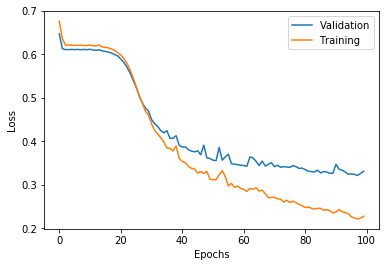

In [26]:
with open('./%s/hist_0.json' % path_info['model_info']['model_dir'], 'r') as f:
    history = json.load(f)
    
plt.plot(history['val_loss'], label='Validation')
plt.plot(history['loss'], label='Training')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Test evauation and train evauation is the numpy array of the shape (number of fold, number of evaluation measures).

In [27]:
test_evaluation

array([[0.23001722, 0.884     , 0.93491125, 0.77777779, 0.85273278,
        0.9723866 ],
       [0.43164325, 0.80800003, 0.93678159, 0.5131579 , 0.6933375 ,
        0.86021626],
       [0.60169631, 0.71200001, 1.        , 0.        , 0.        ,
        0.53889668]])

In [28]:
train_evaluation

array([[0.25114068, 0.88800001, 0.91891891, 0.81896549, 0.86750382,
        0.95781189],
       [0.37452886, 0.84399998, 0.95970696, 0.53431374, 0.71608979,
        0.89557296],
       [0.62596804, 0.68133336, 1.        , 0.        , 0.        ,
        0.52149367]])

## 5. Load the pre-trained network for training

If you have pre-trianed model, you can use the pre-trained weight for next training. For using pre-trained weights, you have to use `warm_start` option in `training_inro` with addding the file path of the pre-trained weights in the `warm_start_model` option. Below is the example:

In [29]:
warm_start_network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'lr': '0.01',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'network_class': 'DeepBiomeNetwork',
        'normalizer': 'normalize_minmax',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'taxa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure'
    },
    'training_info': {
        'warm_start':'True',
        'warm_start_model':'./example_result/weight.h5',
        'batch_size': '200',
        'epochs': '100'
    },
    'validation_info': {
        'batch_size': 'None', 
        'validation_size': '0.2'
    },
    'test_info': {
        'batch_size': 'None'
    }
}

In [30]:
test_evaluation, train_evaluation, network = deepbiome.deepbiome_train(log, warm_start_network_info, path_info, 
                                                                       number_of_fold=3)

[root    |INFO|deepbiome.py:100] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:137] -------1 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 1 simulation
[root    |INFO|build_network.py:505] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:506] Read phylogenetic tree information from /DATA/home/muha/github_repos/deepbiome/deepbiome/tests/data/genus48_dic.csv
[root    |INFO|build_network.py:510] Phylogenetic tree level list: ['Ge

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|build_network.py:83] Load trained model weight at ./example_result/weight_0.h5 
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 1 fold computing start!----------------------------------
[root    |INFO|build_network.py:133] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 0s 739us/step - loss: 0.2269 - binary_accuracy: 0.9117 - sensitivity: 0.9152 - specificity: 0.9014 - gmeasure: 0.9072 - auc: 0.9684 - val_loss: 0.3253 - val_binary_accuracy: 0.8600 - val_sensitivity: 0.8476 - val_specificity: 0.8889 - val_gmeasure: 0.8680 - val_auc: 0.9331
Epoch 2/100
600/600 [==============================] - 0s 63us/step - loss: 0.2289 - binary_accuracy: 0.9000 - sensitivity: 0.9133 - specificity: 0.8750 - gmeasure: 0.8921 - auc: 0.9686 - val_loss: 0.3295 - val_binary_accuracy: 0.8667 - val_sensitivity: 0.8857 - val_specificity: 0.8222 - val_gmeasure: 0.8534 - val_auc: 0.9291
Epoch 3/100
600/600 [==============================] - 0s 61us/step - loss: 0.2198 - binary_accuracy: 0.9133 - sensitivity: 0.9276 - specificity: 0.8858 - gmeasure: 0.9062 - auc: 0.9677 - val_loss: 0.3335 - val_binary_accuracy: 0.8400 - val_sensitivity: 0.8095 - val_specificity: 0.9111 - val_gmea

Epoch 26/100
600/600 [==============================] - 0s 66us/step - loss: 0.1934 - binary_accuracy: 0.9217 - sensitivity: 0.9165 - specificity: 0.9374 - gmeasure: 0.9267 - auc: 0.9746 - val_loss: 0.3234 - val_binary_accuracy: 0.8467 - val_sensitivity: 0.8286 - val_specificity: 0.8889 - val_gmeasure: 0.8582 - val_auc: 0.9378
Epoch 27/100
600/600 [==============================] - 0s 62us/step - loss: 0.1913 - binary_accuracy: 0.9250 - sensitivity: 0.9075 - specificity: 0.9579 - gmeasure: 0.9319 - auc: 0.9756 - val_loss: 0.3205 - val_binary_accuracy: 0.8733 - val_sensitivity: 0.8762 - val_specificity: 0.8667 - val_gmeasure: 0.8714 - val_auc: 0.9371
Epoch 28/100
600/600 [==============================] - 0s 66us/step - loss: 0.1895 - binary_accuracy: 0.9217 - sensitivity: 0.9204 - specificity: 0.9242 - gmeasure: 0.9223 - auc: 0.9734 - val_loss: 0.3203 - val_binary_accuracy: 0.8667 - val_sensitivity: 0.8762 - val_specificity: 0.8444 - val_gmeasure: 0.8602 - val_auc: 0.9361
Epoch 29/100


Epoch 51/100
600/600 [==============================] - 0s 66us/step - loss: 0.1745 - binary_accuracy: 0.9250 - sensitivity: 0.9279 - specificity: 0.9214 - gmeasure: 0.9242 - auc: 0.9788 - val_loss: 0.3175 - val_binary_accuracy: 0.8600 - val_sensitivity: 0.8667 - val_specificity: 0.8444 - val_gmeasure: 0.8555 - val_auc: 0.9403
Epoch 52/100
600/600 [==============================] - 0s 64us/step - loss: 0.1745 - binary_accuracy: 0.9350 - sensitivity: 0.9154 - specificity: 0.9784 - gmeasure: 0.9463 - auc: 0.9804 - val_loss: 0.3225 - val_binary_accuracy: 0.8667 - val_sensitivity: 0.8381 - val_specificity: 0.9333 - val_gmeasure: 0.8844 - val_auc: 0.9426
Epoch 53/100
600/600 [==============================] - 0s 66us/step - loss: 0.1790 - binary_accuracy: 0.9283 - sensitivity: 0.9191 - specificity: 0.9557 - gmeasure: 0.9363 - auc: 0.9796 - val_loss: 0.3240 - val_binary_accuracy: 0.8733 - val_sensitivity: 0.8952 - val_specificity: 0.8222 - val_gmeasure: 0.8580 - val_auc: 0.9380
Epoch 54/100


Epoch 76/100
600/600 [==============================] - 0s 63us/step - loss: 0.1478 - binary_accuracy: 0.9367 - sensitivity: 0.9369 - specificity: 0.9368 - gmeasure: 0.9368 - auc: 0.9827 - val_loss: 0.3102 - val_binary_accuracy: 0.8800 - val_sensitivity: 0.8571 - val_specificity: 0.9333 - val_gmeasure: 0.8944 - val_auc: 0.9484
Epoch 77/100
600/600 [==============================] - 0s 66us/step - loss: 0.1450 - binary_accuracy: 0.9433 - sensitivity: 0.9299 - specificity: 0.9755 - gmeasure: 0.9524 - auc: 0.9857 - val_loss: 0.3065 - val_binary_accuracy: 0.8933 - val_sensitivity: 0.8762 - val_specificity: 0.9333 - val_gmeasure: 0.9043 - val_auc: 0.9484
Epoch 78/100
600/600 [==============================] - 0s 66us/step - loss: 0.1433 - binary_accuracy: 0.9467 - sensitivity: 0.9320 - specificity: 0.9781 - gmeasure: 0.9546 - auc: 0.9851 - val_loss: 0.3039 - val_binary_accuracy: 0.8867 - val_sensitivity: 0.8857 - val_specificity: 0.8889 - val_gmeasure: 0.8873 - val_auc: 0.9477
Epoch 79/100


[root    |INFO|build_network.py:143] Training end with time 5.879864931106567!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_0.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_0.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_0.json
[root    |INFO|build_network.py:169] Evaluation start!


750/750 [==============================] - 0s 7us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.010180473327636719!
[root    |INFO|build_network.py:175] Evaluation: [0.15661081671714783, 0.9440000057220459, 0.9382239580154419, 0.9568965435028076, 0.9475142359733582, 0.9810194969177246]
[root    |INFO|build_network.py:169] Evaluation start!


250/250 [==============================] - 0s 22us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.010858297348022461!
[root    |INFO|build_network.py:175] Evaluation: [0.14900001883506775, 0.9480000138282776, 0.9704142212867737, 0.9012345671653748, 0.9351849555969238, 0.9853166937828064]
[root    |INFO|deepbiome.py:179] Compute time : 7.261319160461426
[root    |INFO|deepbiome.py:180] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------2 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 2 simulation
[root    |INFO|build_network.p

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|build_network.py:83] Load trained model weight at ./example_result/weight_1.h5 
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 2 fold computing start!----------------------------------
[root    |INFO|build_network.py:133] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 0s 686us/step - loss: 0.3767 - binary_accuracy: 0.8333 - sensitivity: 0.9704 - specificity: 0.4761 - gmeasure: 0.6727 - auc: 0.9018 - val_loss: 0.3953 - val_binary_accuracy: 0.8400 - val_sensitivity: 0.9725 - val_specificity: 0.4878 - val_gmeasure: 0.6888 - val_auc: 0.8693
Epoch 2/100
600/600 [==============================] - 0s 63us/step - loss: 0.3705 - binary_accuracy: 0.8467 - sensitivity: 0.9448 - specificity: 0.5815 - gmeasure: 0.7395 - auc: 0.9018 - val_loss: 0.3981 - val_binary_accuracy: 0.8400 - val_sensitivity: 0.9450 - val_specificity: 0.5610 - val_gmeasure: 0.7281 - val_auc: 0.8682
Epoch 3/100
600/600 [==============================] - 0s 62us/step - loss: 0.3702 - binary_accuracy: 0.8450 - sensitivity: 0.9364 - specificity: 0.5987 - gmeasure: 0.7485 - auc: 0.9026 - val_loss: 0.3937 - val_binary_accuracy: 0.8400 - val_sensitivity: 0.9725 - val_specificity: 0.4878 - val_gmea

Epoch 26/100
600/600 [==============================] - 0s 63us/step - loss: 0.3354 - binary_accuracy: 0.8467 - sensitivity: 0.9411 - specificity: 0.5954 - gmeasure: 0.7485 - auc: 0.9137 - val_loss: 0.3726 - val_binary_accuracy: 0.8400 - val_sensitivity: 0.9541 - val_specificity: 0.5366 - val_gmeasure: 0.7155 - val_auc: 0.8841
Epoch 27/100
600/600 [==============================] - 0s 66us/step - loss: 0.3334 - binary_accuracy: 0.8467 - sensitivity: 0.9384 - specificity: 0.6031 - gmeasure: 0.7509 - auc: 0.9145 - val_loss: 0.3713 - val_binary_accuracy: 0.8400 - val_sensitivity: 0.9541 - val_specificity: 0.5366 - val_gmeasure: 0.7155 - val_auc: 0.8859
Epoch 28/100
600/600 [==============================] - 0s 60us/step - loss: 0.3322 - binary_accuracy: 0.8483 - sensitivity: 0.9410 - specificity: 0.6031 - gmeasure: 0.7527 - auc: 0.9165 - val_loss: 0.3707 - val_binary_accuracy: 0.8400 - val_sensitivity: 0.9541 - val_specificity: 0.5366 - val_gmeasure: 0.7155 - val_auc: 0.8861
Epoch 29/100


Epoch 51/100
600/600 [==============================] - 0s 64us/step - loss: 0.2977 - binary_accuracy: 0.8600 - sensitivity: 0.9491 - specificity: 0.6219 - gmeasure: 0.7683 - auc: 0.9314 - val_loss: 0.3465 - val_binary_accuracy: 0.8600 - val_sensitivity: 0.9541 - val_specificity: 0.6098 - val_gmeasure: 0.7627 - val_auc: 0.9017
Epoch 52/100
600/600 [==============================] - 0s 64us/step - loss: 0.3010 - binary_accuracy: 0.8700 - sensitivity: 0.9185 - specificity: 0.7479 - gmeasure: 0.8284 - auc: 0.9326 - val_loss: 0.3470 - val_binary_accuracy: 0.8533 - val_sensitivity: 0.9541 - val_specificity: 0.5854 - val_gmeasure: 0.7473 - val_auc: 0.9014
Epoch 53/100
600/600 [==============================] - 0s 66us/step - loss: 0.2958 - binary_accuracy: 0.8617 - sensitivity: 0.9376 - specificity: 0.6561 - gmeasure: 0.7839 - auc: 0.9317 - val_loss: 0.3558 - val_binary_accuracy: 0.8467 - val_sensitivity: 0.9541 - val_specificity: 0.5610 - val_gmeasure: 0.7316 - val_auc: 0.9040
Epoch 54/100


Epoch 76/100
600/600 [==============================] - 0s 67us/step - loss: 0.2619 - binary_accuracy: 0.8917 - sensitivity: 0.9452 - specificity: 0.7491 - gmeasure: 0.8410 - auc: 0.9485 - val_loss: 0.3178 - val_binary_accuracy: 0.8800 - val_sensitivity: 0.9725 - val_specificity: 0.6341 - val_gmeasure: 0.7853 - val_auc: 0.9183
Epoch 77/100
600/600 [==============================] - 0s 63us/step - loss: 0.2611 - binary_accuracy: 0.8950 - sensitivity: 0.9566 - specificity: 0.7294 - gmeasure: 0.8353 - auc: 0.9478 - val_loss: 0.3117 - val_binary_accuracy: 0.8800 - val_sensitivity: 0.9633 - val_specificity: 0.6585 - val_gmeasure: 0.7965 - val_auc: 0.9190
Epoch 78/100
600/600 [==============================] - 0s 64us/step - loss: 0.2590 - binary_accuracy: 0.8933 - sensitivity: 0.9411 - specificity: 0.7628 - gmeasure: 0.8471 - auc: 0.9477 - val_loss: 0.3097 - val_binary_accuracy: 0.8800 - val_sensitivity: 0.9633 - val_specificity: 0.6585 - val_gmeasure: 0.7965 - val_auc: 0.9197
Epoch 79/100


[root    |INFO|build_network.py:143] Training end with time 5.811546802520752!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_1.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_1.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_1.json
[root    |INFO|build_network.py:169] Evaluation start!


750/750 [==============================] - 0s 7us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.010724306106567383!
[root    |INFO|build_network.py:175] Evaluation: [0.2627646028995514, 0.8933333158493042, 0.9688644409179688, 0.6911764740943909, 0.8183253407478333, 0.9525425434112549]
[root    |INFO|build_network.py:169] Evaluation start!


250/250 [==============================] - 0s 14us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.010526657104492188!
[root    |INFO|build_network.py:175] Evaluation: [0.37938588857650757, 0.8519999980926514, 0.9482758641242981, 0.6315789222717285, 0.773893415927887, 0.9102767705917358]
[root    |INFO|deepbiome.py:179] Compute time : 7.311078310012817
[root    |INFO|deepbiome.py:180] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:137] -------3 simulation start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:147] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:148] Build network for 3 simulation
[root    |INFO|build_network.py

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|build_network.py:83] Load trained model weight at ./example_result/weight_2.h5 
[root    |INFO|deepbiome.py:157] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:158] 3 fold computing start!----------------------------------
[root    |INFO|build_network.py:133] Training start!


Train on 600 samples, validate on 150 samples
Epoch 1/100
600/600 [==============================] - 0s 634us/step - loss: 0.6207 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5188 - val_loss: 0.6475 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5278
Epoch 2/100
600/600 [==============================] - 0s 61us/step - loss: 0.6204 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5340 - val_loss: 0.6479 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5234
Epoch 3/100
600/600 [==============================] - 0s 64us/step - loss: 0.6208 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5145 - val_loss: 0.6476 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0

Epoch 25/100
600/600 [==============================] - 0s 64us/step - loss: 0.6204 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5210 - val_loss: 0.6483 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5596
Epoch 26/100
600/600 [==============================] - 0s 67us/step - loss: 0.6205 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5251 - val_loss: 0.6483 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5287
Epoch 27/100
600/600 [==============================] - 0s 65us/step - loss: 0.6204 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5204 - val_loss: 0.6483 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmea

Epoch 49/100
600/600 [==============================] - 0s 59us/step - loss: 0.6204 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5272 - val_loss: 0.6481 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5236
Epoch 50/100
600/600 [==============================] - 0s 61us/step - loss: 0.6205 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5408 - val_loss: 0.6481 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5299
Epoch 51/100
600/600 [==============================] - 0s 64us/step - loss: 0.6205 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5219 - val_loss: 0.6480 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmea

Epoch 73/100
600/600 [==============================] - 0s 62us/step - loss: 0.6204 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5337 - val_loss: 0.6480 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5354
Epoch 74/100
600/600 [==============================] - 0s 66us/step - loss: 0.6204 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5268 - val_loss: 0.6482 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5123
Epoch 75/100
600/600 [==============================] - 0s 62us/step - loss: 0.6205 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5308 - val_loss: 0.6481 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmea

Epoch 97/100
600/600 [==============================] - 0s 67us/step - loss: 0.6204 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5274 - val_loss: 0.6481 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5347
Epoch 98/100
600/600 [==============================] - 0s 68us/step - loss: 0.6204 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5290 - val_loss: 0.6481 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmeasure: 0.0000e+00 - val_auc: 0.5260
Epoch 99/100
600/600 [==============================] - 0s 63us/step - loss: 0.6205 - binary_accuracy: 0.6883 - sensitivity: 1.0000 - specificity: 0.0000e+00 - gmeasure: 0.0000e+00 - auc: 0.5270 - val_loss: 0.6481 - val_binary_accuracy: 0.6533 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_gmea

[root    |INFO|build_network.py:143] Training end with time 5.78258204460144!
[root    |INFO|build_network.py:79] Saved trained model weight at ./example_result/weight_2.h5 
[root    |DEBUG|deepbiome.py:166] Save weight at ./example_result/weight_2.h5
[root    |DEBUG|deepbiome.py:169] Save history at ./example_result/hist_2.json
[root    |INFO|build_network.py:169] Evaluation start!


750/750 [==============================] - 0s 5us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.01048731803894043!
[root    |INFO|build_network.py:175] Evaluation: [0.625942587852478, 0.6813333630561829, 1.0, 0.0, 0.0, 0.5268486738204956]
[root    |INFO|build_network.py:169] Evaluation start!


250/250 [==============================] - 0s 16us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.011304616928100586!
[root    |INFO|build_network.py:175] Evaluation: [0.6017928123474121, 0.7120000123977661, 1.0, 0.0, 0.0, 0.5361267328262329]
[root    |INFO|deepbiome.py:179] Compute time : 7.283475637435913
[root    |INFO|deepbiome.py:180] 3 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:183] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:185] Train Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:188]       mean : [0.34843934 0.83955556 0.96902947 0.54935767 0.58861319 0.8201369 ]
[root    |INFO|deepbiome.py:189]        std : [0.20095306 0.11377603 0.02522023 0.40331723 0.41954067 0.2077117 ]
[root    |INFO|deepbiome.py:190] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:192] Test Evaluation : ['loss' 'binary_accuracy

Let's check the history plot again.

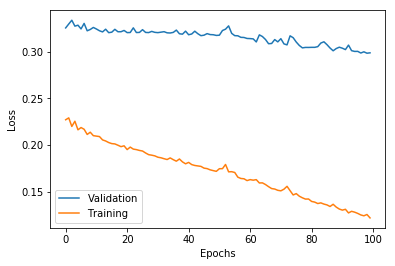

In [31]:
with open('./%s/hist_0.json' % path_info['model_info']['model_dir'], 'r') as f:
    history = json.load(f)
    
plt.plot(history['val_loss'], label='Validation')
plt.plot(history['loss'], label='Training')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## 6. Load the pre-trained network for testing

If you want to test the trained model, you can use the `deepbiome_test` function. If you use the index file, this function provide the evaluation using test index (index set not included in the index file) for each fold. If not, this function provide the evaluation using the whole samples. If `number_of_fold` is setted as `k`, the function will test the model only with first `k` folds.

In [32]:
test_network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'lr': '0.01',
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'texa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure',
        'network_class': 'DeepBiomeNetwork',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'normalizer': 'normalize_minmax',
    },
    'test_info': {
        'batch_size': 'None'
    }
}

In [33]:
test_path_info = {
    'data_info': {
        'count_list_path': resource_filename('deepbiome', 'tests/data/gcount_list.csv'),
        'count_path': resource_filename('deepbiome', 'tests/data/count'),
        'data_path': resource_filename('deepbiome', 'tests/data'),
        'idx_path': resource_filename('deepbiome', 'tests/data/classification_idx.csv'),
        'tree_info_path': resource_filename('deepbiome', 'tests/data/genus48_dic.csv'),
        'x_path': '',
        'y_path': 'classification_y.csv'
    },
    'model_info': {
        'evaluation': 'eval.npy',
        'model_dir': './example_result/',
        'weight': 'weight.h5'
    }
}

In [34]:
evaluation = deepbiome.deepbiome_test(log, test_network_info, test_path_info, number_of_fold=3)

[root    |INFO|deepbiome.py:262] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:294] Test Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:296] -------1 fold test start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:306] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:307] Build network for 1 fold testing
[root    |INFO|build_network.py:505] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:506] Read phylogenetic tree information from /DATA/home/muha/github_

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:316] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:317] 1 fold computing start!----------------------------------
[root    |INFO|build_network.py:169] Evaluation start!


250/250 [==============================] - 0s 454us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.3063983917236328!
[root    |INFO|build_network.py:175] Evaluation: [0.14900001883506775, 0.9480000138282776, 0.9704142212867737, 0.9012345671653748, 0.9351849555969238, 0.9853166937828064]
[root    |INFO|deepbiome.py:320] 
[root    |INFO|deepbiome.py:322] Compute time : 1.6649487018585205
[root    |INFO|deepbiome.py:323] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:296] -------2 fold test start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:306] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:307] Build network for 2 fold test

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:316] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:317] 2 fold computing start!----------------------------------
[root    |INFO|build_network.py:169] Evaluation start!


250/250 [==============================] - 0s 270us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.1646728515625!
[root    |INFO|build_network.py:175] Evaluation: [0.37938588857650757, 0.8519999980926514, 0.9482758641242981, 0.6315789222717285, 0.773893415927887, 0.9102767705917358]
[root    |INFO|deepbiome.py:320] 
[root    |INFO|deepbiome.py:322] Compute time : 1.3771986961364746
[root    |INFO|deepbiome.py:323] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:296] -------3 fold test start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:306] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:307] Build network for 3 fold testing


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:316] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:317] 3 fold computing start!----------------------------------
[root    |INFO|build_network.py:169] Evaluation start!


250/250 [==============================] - 0s 335us/step


[root    |INFO|build_network.py:174] Evaluation end with time 0.23140716552734375!
[root    |INFO|build_network.py:175] Evaluation: [0.6017928123474121, 0.7120000123977661, 1.0, 0.0, 0.0, 0.5361267328262329]
[root    |INFO|deepbiome.py:320] 
[root    |INFO|deepbiome.py:322] Compute time : 1.4677846431732178
[root    |INFO|deepbiome.py:323] 3 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:326] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:328] Test Evaluation : ['loss' 'binary_accuracy' 'sensitivity' 'specificity' 'gmeasure' 'auc']
[root    |INFO|deepbiome.py:331]       mean : [0.37672624 0.83733334 0.9728967  0.51093783 0.56969279 0.8105734 ]
[root    |INFO|deepbiome.py:332]        std : [0.18486145 0.09690316 0.02118913 0.37768738 0.40817982 0.19646624]
[root    |INFO|deepbiome.py:333] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:336] Total Com

This function provides the evaluation result as a numpy array with a shape of (number of fold, number of evaluation measures).

In [35]:
print('      %s' % ''.join(['%16s'%'loss']+ ['%16s'%s.strip() for s in network_info['model_info']['metrics'].split(',')]))
print('Mean: %s' % ''.join(['%16.4f'%v for v in np.mean(evaluation, axis=0)]))
print('Std : %s' % ''.join(['%16.4f'%v for v in np.std(evaluation, axis=0)]))

                  loss binary_accuracy     sensitivity     specificity        gmeasure             auc
Mean:           0.3767          0.8373          0.9729          0.5109          0.5697          0.8106
Std :           0.1849          0.0969          0.0212          0.3777          0.4082          0.1965


## 7. Load the pre-trained network for prediction

For prediction using the pre-trained model, we can use the `deepbiome_prediction` function. If `number_of_fold` is set to `k`, the function will predict only with first `k` folds sample's outputs.

In [36]:
prediction_network_info = {
    'architecture_info': {
        'batch_normalization': 'False',
        'drop_out': '0',
        'weight_initial': 'glorot_uniform',
        'weight_l1_penalty':'0.01',
        'weight_decay': 'phylogenetic_tree',
    },
    'model_info': {
        'decay': '0.001',
        'loss': 'binary_crossentropy',
        'lr': '0.01',
        'metrics': 'binary_accuracy, sensitivity, specificity, gmeasure, auc',
        'network_class': 'DeepBiomeNetwork',
        'normalizer': 'normalize_minmax',
        'optimizer': 'adam',
        'reader_class': 'MicroBiomeClassificationReader',
        'taxa_selection_metrics': 'accuracy, sensitivity, specificity, gmeasure'
    },
    'test_info': {
        'batch_size': 'None'
    }
}

In [37]:
prediction_path_info = {
    'data_info': {
        'count_list_path': resource_filename('deepbiome', 'tests/data/gcount_list.csv'),
        'count_path': resource_filename('deepbiome', 'tests/data/count'),
        'data_path': resource_filename('deepbiome', 'tests/data'),
        'tree_info_path': resource_filename('deepbiome', 'tests/data/genus48_dic.csv'),
        'x_path': '',
    },
    'model_info': {
        'model_dir': './example_result/',
        'weight': 'weight_0.h5'
    }
}

In [38]:
prediction = deepbiome.deepbiome_prediction(log, prediction_network_info, prediction_path_info,
                                            num_classes = 1, number_of_fold=3)

[root    |INFO|deepbiome.py:393] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:420] -------1 th repeatition prediction start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:429] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:430] Build network for 1 fold testing
[root    |INFO|build_network.py:505] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:506] Read phylogenetic tree information from /DATA/home/muha/github_repos/deepbiome/deepbiome/tests/data/genus48_dic.csv
[root    |INFO|build_network.py:510] Phylogenetic tree

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:440] -----------------------------------------------------------------
[root    |INFO|build_network.py:189] Prediction start!


1000/1000 [==============================] - 0s 36us/step


[root    |INFO|build_network.py:194] Prediction end with time 0.03861713409423828!
[root    |INFO|deepbiome.py:444] Compute time : 0.978487491607666
[root    |INFO|deepbiome.py:445] 1 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:420] -------2 th repeatition prediction start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:429] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:430] Build network for 2 fold testing
[root    |INFO|build_network.py:505] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:506] Read phylogenetic tr

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:440] -----------------------------------------------------------------
[root    |INFO|build_network.py:189] Prediction start!


1000/1000 [==============================] - 0s 42us/step


[root    |INFO|build_network.py:194] Prediction end with time 0.04507732391357422!
[root    |INFO|deepbiome.py:444] Compute time : 1.0234794616699219
[root    |INFO|deepbiome.py:445] 2 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:420] -------3 th repeatition prediction start!----------------------------------
[root    |INFO|readers.py:58] -----------------------------------------------------------------------
[root    |INFO|readers.py:59] Construct Dataset
[root    |INFO|readers.py:60] -----------------------------------------------------------------------
[root    |INFO|readers.py:61] Load data
[root    |INFO|deepbiome.py:429] -----------------------------------------------------------------
[root    |INFO|deepbiome.py:430] Build network for 3 fold testing
[root    |INFO|build_network.py:505] ------------------------------------------------------------------------------------------
[root    |INFO|build_network.py:506] Read phylogenetic t

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 48)                0         
_________________________________________________________________
l1_dense (Dense_with_tree)   (None, 40)                1960      
_________________________________________________________________
l1_activation (Activation)   (None, 40)                0         
_________________________________________________________________
l2_dense (Dense_with_tree)   (None, 23)                943       
_________________________________________________________________
l2_activation (Activation)   (None, 23)                0         
_________________________________________________________________
l3_dense (Dense_with_tree)   (None, 17)                408       
_________________________________________________________________
l3_activation (Activation)   (None, 17)                0   

[root    |INFO|build_network.py:57] Build Network
[root    |INFO|build_network.py:58] Optimizer = adam
[root    |INFO|build_network.py:59] Loss = binary_crossentropy
[root    |INFO|build_network.py:60] Metrics = binary_accuracy, sensitivity, specificity, gmeasure, auc
[root    |INFO|deepbiome.py:440] -----------------------------------------------------------------
[root    |INFO|build_network.py:189] Prediction start!


1000/1000 [==============================] - 0s 45us/step


[root    |INFO|build_network.py:194] Prediction end with time 0.04752993583679199!
[root    |INFO|deepbiome.py:444] Compute time : 1.0356991291046143
[root    |INFO|deepbiome.py:445] 3 fold computing end!---------------------------------------------
[root    |INFO|deepbiome.py:449] Total Computing Ended
[root    |INFO|deepbiome.py:450] -----------------------------------------------------------------


In [39]:
prediction.shape

(3, 1000, 1)

In [40]:
prediction[0,:10]

array([[0.9580059 ],
       [0.91303825],
       [0.07534188],
       [0.10720441],
       [1.        ],
       [0.93563545],
       [0.08312383],
       [0.11105517],
       [0.9999993 ],
       [0.99975   ]], dtype=float32)